In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as smf
import sys
import subprocess
import seaborn as sns

from glob import glob
from pathlib import Path
from datetime import datetime
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# input for recoding

In [27]:
# SNPs:
# rs55880880 HbA1c
# rs147326498 testosterone
# rs769441779 oestradiol
# rs142164313 G43

initial_13_pheno_snps = ['rs55880880', 'rs142164313']
later_biomarker_snps = ['rs147326498', 'rs73204551']

df = pd.read_csv("../../PLINK_LM_OUTPUT/20250923_biomarkers/DOMDEV_flt/20250923_female_dom.oestradiol.domdev",
                 sep = '\t')

df[df['ID'].isin(initial_13_pheno_snps)][['ID', 'A1']].to_csv("../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_initial.allele", 
                                                              sep = '\t', header = False, index = False)
df[df['ID'].isin(initial_13_pheno_snps)][['ID']].to_csv("../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_initial.txt", 
                                                        sep = '\t', header = False, index = False)

df[df['ID'].isin(later_biomarker_snps)][['ID', 'A1']].to_csv("../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_later.allele", 
                                                             sep = '\t', header = False, index = False)
df[df['ID'].isin(later_biomarker_snps)][['ID']].to_csv("../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_later.txt", 
                                                       sep = '\t', header = False, index = False)

/tmp/ipykernel_504965/1105510380.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../PLINK_LM_OUTPUT/20250923_biomarkers/DOMDEV_flt/20250923_female_dom.oestradiol.domdev",


# recode

In [28]:
date = datetime.now().strftime("%Y%m%d")

plink2 = "../../EXECUTABLES/plink2"
pfile = "../../../ukb_pfile/allchr"

snplist = "../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_initial"
recode_out = f"../../PLINK_RECODE_OUTPUT/{date}_2_chrx_domdev_snp_initial"

cmd = [
    plink2,
    "--pfile", pfile,
    "--extract", f"{snplist}.txt",
    "--keep", "../../GWAS_INPUT/WBQC_ids_carrie.txt",
    "--export-allele", f"{snplist}.allele",
    "--export", "AD", "include-alt",
    "--out", recode_out,
]


subprocess.run(cmd, check=True)

PLINK v2.0.0-a.7LM AVX2 Intel (1 Sep 2025)         cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../PLINK_RECODE_OUTPUT/20251120_2_chrx_domdev_snp_initial.log.
Options in effect:
  --export AD include-alt
  --export-allele ../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_initial.allele
  --extract ../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_initial.txt
  --keep ../../GWAS_INPUT/WBQC_ids_carrie.txt
  --out ../../PLINK_RECODE_OUTPUT/20251120_2_chrx_domdev_snp_initial
  --pfile ../../../ukb_pfile/allchr

Start time: Thu Nov 20 17:09:19 2025
191507 MiB RAM detected, ~169889 available; reserving 95753 MiB for main
workspace.
Using up to 48 threads (change this with --threads).
487432 samples (264294 females, 222986 males, 152 ambiguous; 487432 founders)
loaded from ../../../ukb_pfile/allchr.psam.
96351814 variants loaded from ../../../ukb_pfile/allchr.pvar.
Note: No phenotype data present.
--extract: 2 variants remaining.
-

CompletedProcess(args=['../../EXECUTABLES/plink2', '--pfile', '../../../ukb_pfile/allchr', '--extract', '../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_initial.txt', '--keep', '../../GWAS_INPUT/WBQC_ids_carrie.txt', '--export-allele', '../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_initial.allele', '--export', 'AD', 'include-alt', '--out', '../../PLINK_RECODE_OUTPUT/20251120_2_chrx_domdev_snp_initial'], returncode=0)

In [29]:
date = datetime.now().strftime("%Y%m%d")

plink2 = "../../EXECUTABLES/plink2"
pfile = "../../../ukb_pfile/allchr"

snplist = "../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_later"
recode_out = f"../../PLINK_RECODE_OUTPUT/{date}_2_chrx_domdev_snp_later"

cmd = [
    plink2,
    "--pfile", pfile,
    "--extract", f"{snplist}.txt",
    "--keep", "../../GWAS_INPUT/20250703_both_WB_geno_qced_eids.txt",
    "--export-allele", f"{snplist}.allele",
    "--export", "AD", "include-alt",
    "--out", recode_out,
]


subprocess.run(cmd, check=True)

PLINK v2.0.0-a.7LM AVX2 Intel (1 Sep 2025)         cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../PLINK_RECODE_OUTPUT/20251120_2_chrx_domdev_snp_later.log.
Options in effect:
  --export AD include-alt
  --export-allele ../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_later.allele
  --extract ../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_later.txt
  --keep ../../GWAS_INPUT/20250703_both_WB_geno_qced_eids.txt
  --out ../../PLINK_RECODE_OUTPUT/20251120_2_chrx_domdev_snp_later
  --pfile ../../../ukb_pfile/allchr

Start time: Thu Nov 20 17:09:35 2025
191507 MiB RAM detected, ~169819 available; reserving 95753 MiB for main
workspace.
Using up to 48 threads (change this with --threads).
487432 samples (264294 females, 222986 males, 152 ambiguous; 487432 founders)
loaded from ../../../ukb_pfile/allchr.psam.
96351814 variants loaded from ../../../ukb_pfile/allchr.pvar.
Note: No phenotype data present.
--extract: 2 variants rema

CompletedProcess(args=['../../EXECUTABLES/plink2', '--pfile', '../../../ukb_pfile/allchr', '--extract', '../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_later.txt', '--keep', '../../GWAS_INPUT/20250703_both_WB_geno_qced_eids.txt', '--export-allele', '../../PLINK_RECODE_INPUT/2_chrx_domdev_snp_later.allele', '--export', 'AD', 'include-alt', '--out', '../../PLINK_RECODE_OUTPUT/20251120_2_chrx_domdev_snp_later'], returncode=0)

# plot

In [30]:
def get_gt(path):
    gt = pd.read_csv(path, sep = '\t')
    return gt

def get_snps(gt):
    snplist = {i.split("_")[0] for i in gt.iloc[:,6:].columns}
    return snplist
    
def get_pheno(path):
    pheno = pd.read_csv(path, sep = '\t')
    pheno.replace(-9, np.nan, inplace=True)
    return pheno

def preprocess_pheno(pheno, bts):
    pheno[bts] = pheno[bts] - 1
    return pheno

def get_covar(path):
    covar = pd.read_csv(path, sep = ' ')
    covar = covar[["FID", "IID", "BIRTH_YEAR"] + [f"PC{i}" for i in range(1, 11)]]
    return covar

def rename_gt_cols(gt, snplist):
    rename_cols = {}
    for snp in snplist:
        snp_gt_col = [i for i in gt.columns if i.startswith(snp)][0]
        if "/" in snp_gt_col:
            ref = snp_gt_col.split('_')[1].split("(")[0]
            alt = snp_gt_col.split('/')[1].split(")")[0]
            rename_cols[snp_gt_col] = f"{snp}_{ref}_{alt}"
    gt = gt.rename(columns = rename_cols)
    return gt
            
def get_regression_matrix(pheno_path, gt_path, covar_path, bts):
    gt = get_gt(gt_path)
    snplist = get_snps(gt)
    gt = rename_gt_cols(gt, snplist)
    
    pheno = get_pheno(pheno_path)
    pheno = preprocess_pheno(pheno, bts)
    
    covar = get_covar(covar_path)
    covar = covar[["FID", "IID", "BIRTH_YEAR"] + [f"PC{i}" for i in range(1, 11)]]
    
    df = pd.merge(pheno, gt, on = ['FID', 'IID'], how = 'inner')
    df = df.merge(covar, on = ['FID', 'IID'], how = 'inner')
    return df

def get_formula(coef1, coef2, sex, phenotype, autosome = False):
    if sex == 'male':
        if autosome:
            formula = (f"{phenotype} ~ {coef1} + {coef2} + BIRTH_YEAR + "
                       f"PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10")
        else:
            formula = (f"{phenotype} ~ {coef1} + BIRTH_YEAR + "
                       f"PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10")
    elif sex == 'female':
        formula = (f"{phenotype} ~ {coef1} + {coef2} + BIRTH_YEAR + "
                   f"PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10")
    else:
        raise ValueError("Unsupported sex. Use 'male' or 'female'.")
    return formula
        
def regression(regression_mat, m_formula, f_formula, family = 'normal'):
    m_mat = regression_mat[regression_mat['SEX'] == 1].copy()
    f_mat = regression_mat[regression_mat['SEX'] == 2].copy()

    # Scale covariates
    covariates = ["BIRTH_YEAR"] + [f"PC{i}" for i in range(1, 11)]
    scaler = StandardScaler()
    m_mat[covariates] = scaler.fit_transform(m_mat[covariates])
    f_mat[covariates] = scaler.fit_transform(f_mat[covariates])
    
    if family.lower() == 'normal':
        m_model = smf.ols(m_formula, data=m_mat).fit()
        f_model = smf.ols(f_formula, data=f_mat).fit()
    elif family.lower() == 'binomial':
        m_model = smf.logit(m_formula, data=m_mat).fit()
        f_model = smf.logit(f_formula, data=f_mat).fit()
    else:
        raise ValueError(f"Unsupported family: {family}. Use 'normal' or 'binomial'.")
    return m_model, f_model

def get_coefs(m_model, f_model, *coefs):
    # first coefs should be additive
    # second coefs should be domdev
    if coefs[1] in m_model.params.index:
        # autosome
        het_coef = m_model.params[coefs[0]] + f_model.params[coefs[1]]
    else:
        het_coef = np.nan
    
    return {
        "male": [0, 
                 het_coef, 
                 m_model.params[coefs[0]]], # ordered by number of alt allele
        "female":[0, 
                  f_model.params[coefs[0]] + f_model.params[coefs[1]], 
                  2*f_model.params[coefs[0]]]
    }

    
def get_coefs_se(m_model, f_model, *coefs):
    # first coefs should be additive
    # second coefs should be domdev
    f_cov = f_model.cov_params().loc[coefs[0], coefs[1]]
    f_var = f_model.bse[coefs[0]]**2 + f_model.bse[coefs[1]]**2 + 2*f_cov

    if coefs[1] in m_model.params.index:
        # autosome
        m_cov = m_model.cov_params().loc[coefs[0], coefs[1]]
        m_var = m_model.bse[coefs[0]]**2 + m_model.bse[coefs[1]]**2 + 2*f_cov
    else:
        m_var = np.nan
    return {
        "male": [0, np.sqrt(m_var), m_model.bse[coefs[0]]], # ordered by number of alt allele
        "female":[0, np.sqrt(f_var), 2*f_model.bse[coefs[0]]]
    }


def get_minor_major_allele(regression_mat, snp_gt_col):
    # roughly estimation, since snp count in dosage not simply 0, 1, 2
    if regression_mat[snp_gt_col].value_counts()[2] > regression_mat[snp_gt_col].value_counts()[0]:
        major_allele = snp_gt_col.split("_")[1]
        minor_allele = snp_gt_col.split("_")[2]
    else:
        # print(f"{snp_gt_col}: minor allele != alt allele")
        major_allele = snp_gt_col.split("_")[2]
        minor_allele = snp_gt_col.split("_")[1]
    return major_allele, minor_allele
    
def get_sumstats(snp, regression_mat, phenotype, family, autosome = False):
    snp_stats = []

    snp_gt_cols = [i for i in regression_mat.columns if i.startswith(snp)]
    if len(snp_gt_cols) == 0:
        print(f"SNP {snp} haven't been decoded!")
        return None
    snp_gt_col = [i for i in snp_gt_cols if len(i.split("_")) == 3][0]

    ref_allele = snp_gt_col.split("_")[1]
    alt_allele = snp_gt_col.split("_")[2]

    coef1 = snp_gt_col
    coef2 = snp_gt_col.split("_")[0] + "_HET"

    m_formula = get_formula(coef1, coef2, "male", phenotype, autosome)
    f_formula = get_formula(coef1, coef2, "female", phenotype, autosome)
    
    m_model, f_model = regression(regression_mat, m_formula, f_formula, family = family) # m first, f second
    # print(f_model.params)
    print(coef1)
    print(f_model.params[coef1] , f_model.params[coef2])
    coef_dict = get_coefs(m_model, f_model, coef1, coef2)
    se_dict = get_coefs_se(m_model, f_model, coef1, coef2)

    major_allele, minor_allele = get_minor_major_allele(regression_mat, snp_gt_col)
    
    for sex in regression_mat['SEX'].unique():
        sex_label = 'male' if sex == 1 else 'female'

        # to calculate correct sample size
        sex_mat = regression_mat[regression_mat['SEX'] == sex]
        sex_mat = sex_mat.dropna(subset=[phenotype])
        sex_mat[snp_gt_cols] = sex_mat[snp_gt_cols].round(0)
            
        for genotype in [0, 1, 2]: # number of alt allele
            if genotype == 0:
                gt_value = major_allele if sex == 1 else f"{major_allele}/{major_allele}"
            elif genotype == 1:
                gt_value = np.nan if sex == 1 else f"{major_allele}/{minor_allele}"
            else:
                gt_value =minor_allele if sex == 1 else f"{minor_allele}/{minor_allele}"
            
            snp_stats.append({
                'SEX': sex_label,
                'gt_col': snp_gt_col,
                'ID': snp,
                'gt_code': genotype,
                'gt_value': gt_value,
                'major_allele': major_allele,
                'minor_allele': minor_allele,
                'ref_allele': ref_allele,
                'alt_allele': alt_allele,
                'BETA': coef_dict[sex_label][genotype],
                'SE': se_dict[sex_label][genotype],
                'N': sex_mat[snp_gt_col].value_counts().get(genotype, 0)
            })   
    return pd.DataFrame(snp_stats)

def plot_summary_stats(all_snp_stats, save_path = None):
    snps = all_snp_stats['ID'].unique()

    fig, axs = plt.subplots(1, len(snps), figsize=(len(snps) * 4, 3))
    
    # Handle case where there's only one SNP
    if len(snps) == 1:
        axs = [axs]

    for i, snp in enumerate(snps):
        snp_df = all_snp_stats[all_snp_stats['ID'] == snp]
        major = snp_df["major_allele"].unique()[0]
        minor = snp_df["minor_allele"].unique()[0]

        assert len(major) == 1
        assert len(minor) == 1

        gt_order = [f"{major}/{major}", f"{major}/{minor}", f"{minor}/{minor}"]
        snp_df['gt_value'] = pd.Categorical(snp_df['gt_value'], categories=gt_order, ordered=True)

        x_base = np.arange(len(gt_order))
        offset = 0.07
        snp_df['x_pos'] = snp_df.apply(
            lambda row: x_base[gt_order.index(row['gt_value'])] - offset 
            if row['SEX']=='male' 
            else x_base[gt_order.index(row['gt_value'])] + offset, axis=1
        )

        # Plot
        sns.scatterplot(
            x='x_pos', y='BETA', hue='SEX', 
            data=snp_df, s=100, zorder=2, palette=["steelblue", "indianred"],
            ax=axs[i]
        )

        # Error bars
        for j, row in snp_df.iterrows():
            axs[i].errorbar(
                x=row['x_pos'], 
                y=row['BETA'], 
                yerr=row['SE'], 
                fmt='none', 
                ecolor='gray', 
                zorder=1, 
                capsize=5
            )

        # --- Custom xtick labels with male/female N ---
        n_table = snp_df.pivot(index="gt_value", columns="SEX", values="N").reindex(gt_order)

        xtick_labels = [
            f"{gt}\nN female={int(n_table.loc[gt, 'female'])}\nN male={int(n_table.loc[gt, 'male'])}"
            for gt in gt_order
        ]

        axs[i].set_xticks(x_base)
        axs[i].set_xticklabels(xtick_labels)
        pheno = snp_df['pheno'].tolist()[0]
        axs[i].set_title(f"{pheno}: {snp}")
        if i == 0:
            axs[i].set_ylabel("BETA")
        else:
            axs[i].set_ylabel('')
        axs[i].set_xlabel('')

    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path)
    else:
        plt.show()

In [31]:
qts = ["HbA1c", "testosterone", "oestradiol"]
bts = ["G43"]

In [32]:
hba1c_snps = ["rs55880880"]
testosterone_snps = ["rs147326498"]
oestradiol_snps = ["rs73204551"]
g43_snps = ["rs142164313"]

In [33]:
mat = get_regression_matrix(
    pheno_path = "../../GWAS_INPUT/pheno_13_plus_biomarkers.txt",
    gt_path = "../../PLINK_RECODE_OUTPUT/20251117_2_chrx_domdev_snp_initial.raw",
    covar_path = "../../GWAS_INPUT/20250719_covar_both.txt",
    bts = bts
)

In [34]:
hba1c_snp_stats = pd.DataFrame()
for snp in hba1c_snps:
    snp_stats = get_sumstats(snp, mat, 'HbA1c', 'normal', autosome = False)
    hba1c_snp_stats = pd.concat([hba1c_snp_stats, snp_stats], axis=0, ignore_index=True)
    
g43_snps_stats = pd.DataFrame()
for snp in g43_snps:
    snp_stats = get_sumstats(snp, mat, 'G43', 'binomial', autosome = False)
    g43_snps_stats = pd.concat([g43_snps_stats, snp_stats], axis=0, ignore_index=True)

rs55880880_T_C
4.097172041669048 -4.061795482860245
Optimization terminated successfully.
         Current function value: 0.028262
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.064431
         Iterations 9
rs142164313_C_T
1.2031173242746431 -1.4946972405765224


In [40]:
mat = get_regression_matrix(
    pheno_path = "../../GWAS_INPUT/pheno_13_plus_biomarkers.txt",
    gt_path = "../../PLINK_RECODE_OUTPUT/20251120_2_chrx_domdev_snp_later.raw",
    covar_path = "../../GWAS_INPUT/20250719_covar_both.txt",
    bts = bts
)

In [41]:
testosterone_snp_stats = pd.DataFrame()
for snp in testosterone_snps:
    snp_stats = get_sumstats(snp, mat, 'testosterone', 'normal', autosome = False)
    testosterone_snp_stats = pd.concat([testosterone_snp_stats, snp_stats], axis=0, ignore_index=True)

oestradiol_snp_stats = pd.DataFrame()
for snp in oestradiol_snps:
    snp_stats = get_sumstats(snp, mat, 'oestradiol', 'normal', autosome = False)
    oestradiol_snp_stats = pd.concat([oestradiol_snp_stats, snp_stats], axis=0, ignore_index=True)

rs147326498_A_C
0.25709928294722456 -0.2610429861184509
rs73204551_G_A
256.2585837054235 -266.1606997362359


In [42]:
hba1c_snp_stats['pheno'] = 'HbA1c'
g43_snps_stats['pheno'] = "Migraine"
testosterone_snp_stats['pheno'] = 'Testosterone'
oestradiol_snp_stats['pheno'] = "Estradiol"

all_snp_stats = pd.concat([hba1c_snp_stats, g43_snps_stats, testosterone_snp_stats, oestradiol_snp_stats])

In [43]:
all_snp_stats

,SEX,gt_col,ID,gt_code,gt_value,major_allele,minor_allele,ref_allele,alt_allele,BETA,SE,N,pheno
0,male,rs55880880_T_C,rs55880880,0,C,C,T,T,C,0.000000,0.000000,146579,HbA1c
1,male,rs55880880_T_C,rs55880880,1,NaN,C,T,T,C,NaN,NaN,281,HbA1c
2,male,rs55880880_T_C,rs55880880,2,T,C,T,T,C,0.059723,0.083824,1855,HbA1c
3,female,rs55880880_T_C,rs55880880,0,C/C,C,T,T,C,0.000000,0.000000,167636,HbA1c
4,female,rs55880880_T_C,rs55880880,1,C/T,C,T,T,C,0.035377,0.083953,4760,HbA1c
5,female,rs55880880_T_C,rs55880880,2,T/T,C,T,T,C,8.194344,1.007108,33,HbA1c
0,male,rs142164313_C_T,rs142164313,0,T,T,C,C,T,0.000000,0.000000,151868,Migraine
1,male,rs142164313_C_T,rs142164313,1,NaN,T,C,C,T,NaN,NaN,725,Migraine
2,male,rs142164313_C_T,rs142164313,2,C,T,C,C,T,-0.303498,0.169502,3445,Migraine
3,female,rs142164313_C_T,rs142164313,0,T/T,T,C,C,T,0.000000,0.000000,172537,Migraine


/tmp/ipykernel_504965/560116747.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  females['gt_value'] = pd.Categorical(females['gt_value'], categories=f_gt_order, ordered=True)
/tmp/ipykernel_504965/560116747.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  females['x_pos'] = females.apply(
/tmp/ipykernel_504965/560116747.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

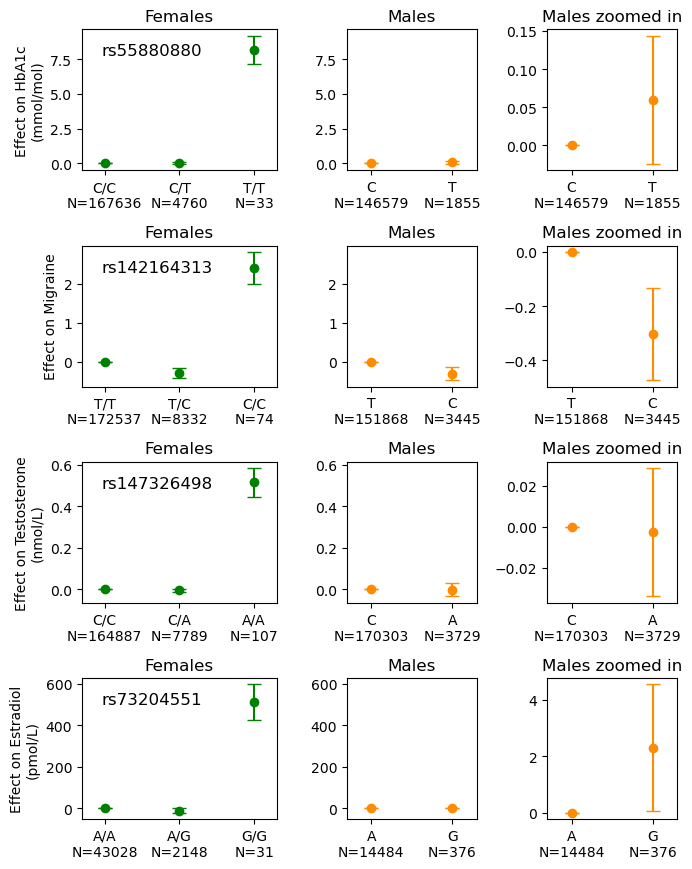

In [44]:
snps = all_snp_stats["ID"].unique()
fig, axs = plt.subplots(
    len(snps), 3,
    figsize=(7, 2.2 * len(snps)),
    gridspec_kw={'width_ratios': [1.2, 0.8, 0.8]}  # first two narrower, third wider
)

for i, snp in enumerate(snps):
    axs[i, 0].sharey(axs[i, 1])
    snp_df = all_snp_stats[all_snp_stats['ID'] == snp]

    pheno = list(snp_df['pheno'])[0]
    if pheno == 'HbA1c':
        pheno = 'HbA1c\n(mmol/mol)'
    if pheno == 'Testosterone':
        pheno = 'Testosterone\n(nmol/L)'
    if pheno == 'Estradiol':
        pheno = 'Estradiol\n(pmol/L)'

    
    major = snp_df["major_allele"].unique()[0]
    minor = snp_df["minor_allele"].unique()[0]

    assert len(major) == 1
    assert len(minor) == 1

    f_gt_order = [f"{major}/{major}", f"{major}/{minor}", f"{minor}/{minor}"]
    m_gt_order = [major, minor]

    females = snp_df[snp_df['SEX'] == 'female']
    males = snp_df[snp_df['SEX'] == 'male']
    males = males.dropna()
    
    females['gt_value'] = pd.Categorical(females['gt_value'], categories=f_gt_order, ordered=True)
    males['gt_value'] = pd.Categorical(males['gt_value'], categories=m_gt_order, ordered=True)

    f_x_base = np.arange(len(f_gt_order))
    females['x_pos'] = females.apply(
        lambda row: f_x_base[f_gt_order.index(row['gt_value'])], axis=1
    )

    m_x_base = np.arange(len(m_gt_order))
    males['x_pos'] = males.apply(
        lambda row: m_x_base[m_gt_order.index(row['gt_value'])], axis=1
    )

    # female
    axs[i, 0].errorbar(
        females["x_pos"], females["BETA"], yerr=females["SE"],
        fmt='o', capsize=5, color='green'
    )
    axs[i, 0].set_title("Females")
    # axs[i, 0].set_xlabel("Genotype code")

    axs[i, 0].set_ylabel(f"Effect on {pheno}")

    n_table = females.pivot(index="gt_value", columns="SEX", values="N").reindex(f_gt_order)
    xtick_labels = [
        f"{gt}\nN={int(n_table.loc[gt, 'female'])}"
        for gt in f_gt_order
    ]
    axs[i, 0].set_xticks(f_x_base)
    axs[i, 0].set_xticklabels(xtick_labels)

    axs[i, 0].set_xlim(f_x_base[0] - 0.3, f_x_base[-1] + 0.3)
    axs[i, 0].text(
        0.1, 0.9,
        snp,
        fontsize=12,
        transform=axs[i, 0].transAxes,
        va='top',
        ha='left'
    )

    # male
    axs[i, 1].errorbar(
        males["x_pos"], males["BETA"], yerr=males["SE"],
        fmt='o', capsize=5, color='darkorange'
    )
    axs[i, 1].set_title("Males")
    # axs[i, 1].set_xlabel("Genotype code")
    # axs[i, 1].set_ylabel("BETA ± SE")

    n_table = males.pivot(index="gt_value", columns="SEX", values="N").reindex(m_gt_order)
    xtick_labels = [
        f"{gt}\nN={int(n_table.loc[gt, 'male'])}"
        for gt in m_gt_order
    ]
    axs[i, 1].set_xticks(m_x_base)
    axs[i, 1].set_xticklabels(xtick_labels)

    axs[i, 1].set_xlim(m_x_base[0] - 0.3, m_x_base[-1] + 0.3)
    
    # male zoom in
    axs[i, 2].errorbar(
        males["x_pos"], males["BETA"], yerr=males["SE"],
        fmt='o', capsize=5, color='darkorange'
    )
    axs[i, 2].set_title("Males zoomed in")
    # axs[i, 2].set_xlabel("Genotype code")
    # axs[i, 2].set_ylabel("BETA ± SE")
    
    n_table = males.pivot(index="gt_value", columns="SEX", values="N").reindex(m_gt_order)
    xtick_labels = [
        f"{gt}\nN={int(n_table.loc[gt, 'male'])}"
        for gt in m_gt_order
    ]
    axs[i, 2].set_xticks(m_x_base)
    axs[i, 2].set_xticklabels(xtick_labels)

    axs[i, 2].set_xlim(m_x_base[0] - 0.3, m_x_base[-1] + 0.3)

plt.tight_layout()
plt.savefig("../../FIGURES/4_snps_gt_beta.pdf")
plt.show()

# supp

In [1]:
len_chr = {
    '1': 249250621,
    '2': 243199373,
    '3': 198022430,
    '4': 191154276,
    '5': 180915260,
    '6': 171115067,
    '7': 159138663,
    '8': 146364022,
    '9': 141213431,
    '10': 135534747,
    '11': 135006516,
    '12': 133851895,
    '13': 115169878,
    '14': 107349540,
    '15': 102531392,
    '16': 90354753,
    '17': 81195210,
    '18': 78077248,
    '19': 59128983,
    '20': 63025520,
    '21': 48129895,
    '22': 51304566,
    'X': 155270560
}

In [35]:
n_signif_snps = []

clump_dir = Path("../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/")
for t in clump_dir.glob("20251008_female_dom*clumps"):
    print(t)
    df = pd.read_csv(t, sep = '\t')
    for c in list(len_chr.keys()):
        tmp_df = df[(df['#CHROM'] == c) & (df['P'] < 5e-8)]
        nsnps = tmp_df.shape[0]
        n_signif_snps.append({
            'pheno': t.stem.split(".")[1],
            'chr': c,
            'nsnps': nsnps,
            'nsnps_weighted': nsnps / len_chr[c]
        })

clump_dir = Path("../../PLINK_CLUMP_OUTPUT/20251107_biomarkers/")
for t in clump_dir.glob("20250923_female_dom*clumps"):
    print(t)
    df = pd.read_csv(t, sep = '\t')
    for c in list(len_chr.keys()):
        tmp_df = df[(df['#CHROM'] == c) & (df['P'] < 5e-8)]
        nsnps = tmp_df.shape[0]
        n_signif_snps.append({
            'pheno': t.stem.split(".")[1],
            'chr': c,
            'nsnps': nsnps,
            'nsnps_weighted': nsnps / len_chr[c]
        })
n_signif_snps = pd.DataFrame(n_signif_snps)

../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/20251008_female_dom.E050.clumps
../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/20251008_female_dom.G43.clumps
../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/20251008_female_dom.HbA1c.clumps
../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/20251008_female_dom.K50.clumps
../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/20251008_female_dom.K51.clumps
../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/20251008_female_dom.M05.clumps
../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/20251008_female_dom.RBC_count.clumps
../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/20251008_female_dom.albumin.clumps
../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/20251008_female_dom.bmi.clumps
../../PLINK_CLUMP_OUTPUT/20251125_all_13_traits/20251008_female_dom.lymphocyte_perc.clumps
../../PLINK_CLUMP_OUTPUT/20251107_biomarkers/20250923_female_dom.IGF1.domdev.clumps
../../PLINK_CLUMP_OUTPUT/20251107_biomarkers/20250923_female_dom.SHBG.domdev.clumps
../../PLINK_CLUMP

In [36]:
# Define mapping
pheno_map = {
    "K50": "Crohn's",
    "K51": "Ulcerative colitis",
    "K80": "Cholelithiasis",
    "M05": "Inflammatory polyarthropathies",
    "G43": "Migraine",
    "F20": "Schizophrenia",
    "E050": "Thyrotoxicosis",
    "albumin": "Albumin",
    "bmi": "BMI",
    "height": "Height",
    "lymphocyte_perc": "Lymphocyte %",
    "RBC_count": "Red blood cell count",
    "cholesterol": "Cholesterol",
    "glucose": "Glucose",
    "IGF1": "IGF-1",
    "oestradiol": "Estradiol",
    "SHBG": "SHBG",
    "testosterone": "Testosterone",
    "total_protein": "Total protein",
    "vitamin_D": "Vitamin D"
}

# Apply mapping to your dataframe
n_signif_snps["pheno"] = n_signif_snps["pheno"].replace(pheno_map)

<Figure size 1200x500 with 0 Axes>

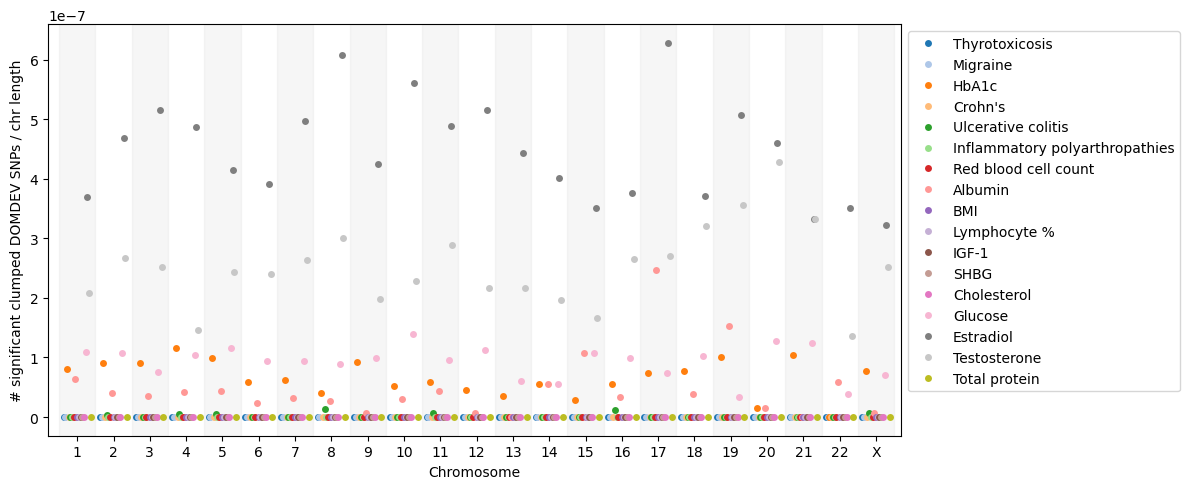

In [37]:
plt.figure(figsize=(12,5))
palette = {pheno: sns.color_palette("tab20")[i] for i, pheno in enumerate(n_signif_snps['pheno'].unique())}

plt.figure(figsize=(12,5))
ax = sns.stripplot(
    data=n_signif_snps,
    x="chr", 
    y="nsnps_weighted", 
    hue="pheno", 
    jitter=True, 
    dodge=True, 
    palette=palette  # assign custom colors
)

xticks = ax.get_xticks()
for i, x in enumerate(xticks):
    if i % 2 == 0:  # shade every other chromosome
        ax.axvspan(x - 0.5, x + 0.5, color="lightgrey", alpha=0.2, zorder=0)

ax.set_xlim(-0.8, len(xticks) - 0.3)

ax.set_xlabel("Chromosome")
ax.set_ylabel("# significant clumped DOMDEV SNPs / chr length")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../../FIGURES/weighted_number_of_significant_SNPs.pdf", bbox_inches = 'tight')